In [28]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
tf.__version__
keras.__version__

'3.6.0'

In [30]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
X_train_full.shape

(60000, 28, 28)

In [32]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [33]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [34]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28, 28])) 
model.add(keras.layers.Dense(300, activation="relu")) 
model.add(keras.layers.Dense(100, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [37]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6791 - loss: 1.0178 - val_accuracy: 0.8304 - val_loss: 0.5018
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8269 - loss: 0.4985 - val_accuracy: 0.8438 - val_loss: 0.4478
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8425 - loss: 0.4494 - val_accuracy: 0.8566 - val_loss: 0.4212
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8553 - loss: 0.4173 - val_accuracy: 0.8608 - val_loss: 0.3971
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8569 - loss: 0.4047 - val_accuracy: 0.8654 - val_loss: 0.3890
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8663 - loss: 0.3827 - val_accuracy: 0.8694 - val_loss: 0.3739
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8688 - loss: 0.3771 - val_accuracy: 0.8700 - val_loss: 0.3704
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8748 - loss: 0.3546 - 

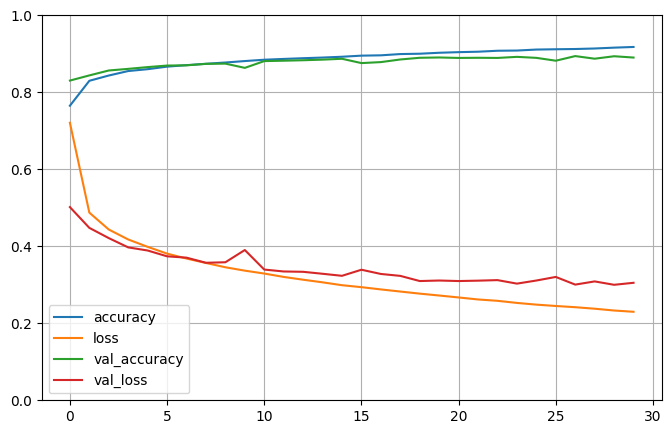

In [38]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
X_test = X_test / 255.0
score = model.evaluate(X_test, y_test, verbose= 0)

In [51]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

TypeError: 'float' object is not subscriptable

using the model to make predictions (306 (book) or 336 (web))

In [40]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred = np.argmax(y_proba, axis=1)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

---------
regression mlp

In [46]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

housing = fetch_california_housing() 
X_train_full, X_test, y_train_full, y_test = train_test_split( housing.data, housing.target) 
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full) 

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

In [47]:
model = keras.models.Sequential([ 
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) 
    ]) 
model.compile(loss="mean_squared_error", optimizer="sgd") 
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid)) 
mse_test = model.evaluate(X_test, y_test) 
X_new = X_test[:3] # pretend these are new instances 
y_pred = model.predict(X_new)

Epoch 1/20


C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2210 - val_loss: 0.6160
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4910 - val_loss: 0.4518
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4514 - val_loss: 0.4974
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4556 - val_loss: 0.4370
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4442 - val_loss: 0.4834
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4138 - val_loss: 0.4057
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3947 - val_loss: 0.4092
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3947 - val_loss: 0.4657
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3922 - val_loss: 0.3939
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3809 - val_loss: 0.3830
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3787 - val_loss: 0.3817
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.